In [3]:
import os
TEUFEL_ROOT = os.path.abspath("..")
os.chdir(TEUFEL_ROOT)

import h5py
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate
import scipy.constants as sc

# sys.path.append(TEUFEL_ROOT+'/scripts')
from scripts.teufel import *
# import scripts.teufel

In [4]:
os.chdir('/home/ulf/Programming/teufel')

In [5]:
!ls

build			    fel-modulation_final.h5    run_tests
clean_tests		    fel-modulation_initial.h5  scripts
CMakeLists.txt		    fel-modulation_start.h5    setup.dox
doc			    fel-modulation_stop.h5     slurm.teufel.sh
examples		    lib			       src
fel1d.hdf5		    LICENSE		       tests
fel1d-modulation_beam.sdds  matching.sdds	       teufel_bunch_start.sdds
fel1d_trajectories.hdf5     rad_push_log.sdds	       undulator_traj.hdf5
fel-modulation_beam.sdds    README.md		       warnings.dox


In [6]:
hdf = h5py.File('undulator_traj.hdf5', "r")
print(hdf)


<HDF5 file "undulator_traj.hdf5" (mode r)>


In [12]:
# Get the group
traj = hdf['Trajectories']
NOTS = traj.attrs.get('NOTS')
NOP = traj.attrs.get('NOP')
print(NOTS, NOP)
a = np.array(traj)
print(a.shape)

3001 1
(3001, 1, 6)


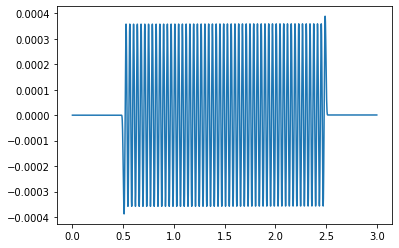

In [14]:
x = a[:,0,0]
z = a[:,0,2]
plt.plot(z,x)
plt.show()